In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [256]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [257]:
print(df.shape)
print(df.info())

(4898, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


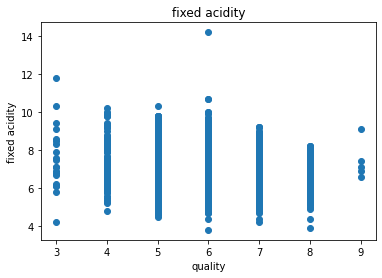

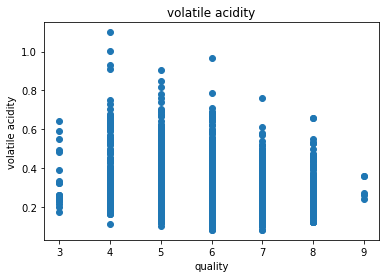

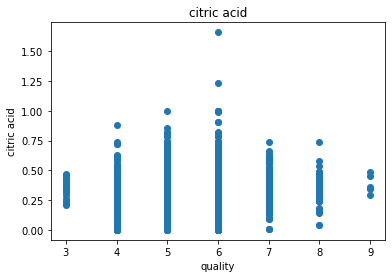

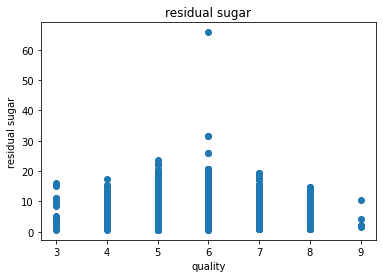

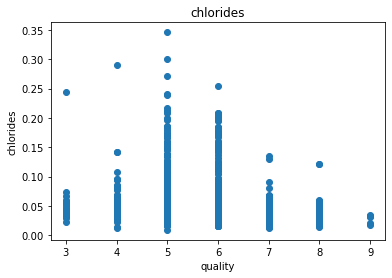

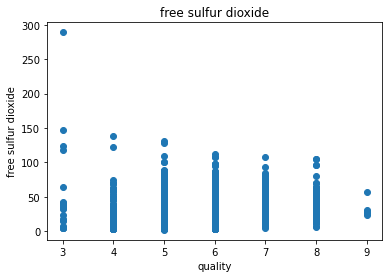

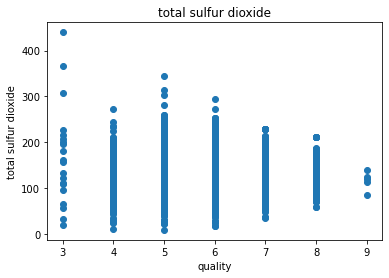

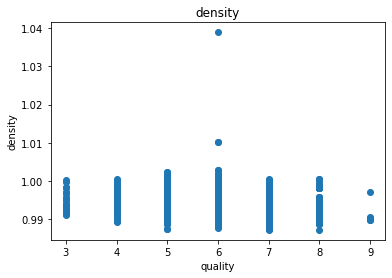

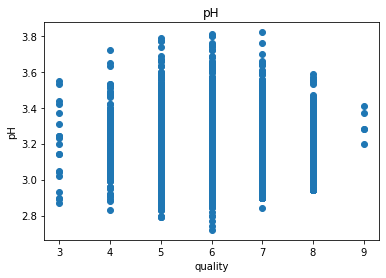

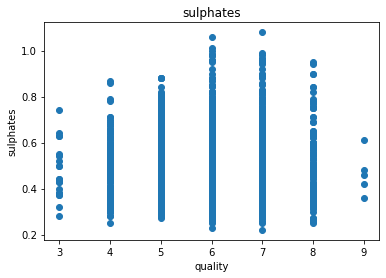

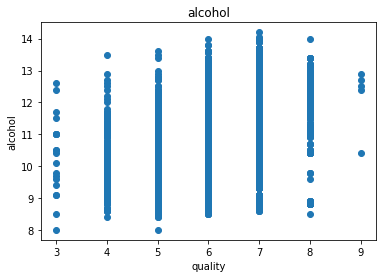

In [258]:
#Explore all Attributes by Wine Quality
for label in df.columns[:-1]:
    plt.scatter(df['quality'], df[label])
    plt.title(label)
    plt.xlabel('quality')
    plt.ylabel(label)
    plt.savefig('imgs/'+'red'.join(label.split(' ')))
    plt.show()
    

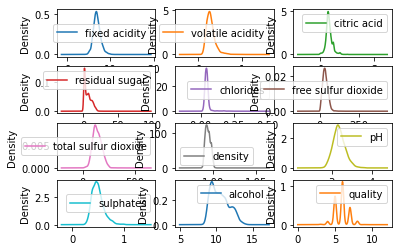

In [259]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.savefig('imgs/density/'+'redDensity'.join(label.split(' ')))
plt.show()

In [260]:
#Correlation Matrix
corr_matrix = df.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [261]:
print(df.columns)
print(df[df.columns[0]].size)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
4898


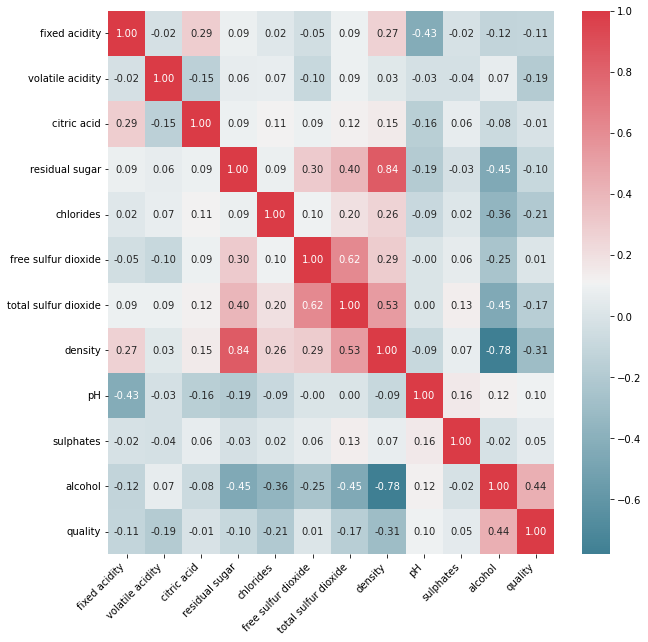

In [262]:
#Column Names

column_names = df.columns

#Figure Size
fig,ax = plt.subplots(figsize=(10,10))

colormap = sns.diverging_palette(220,10, as_cmap=True);

sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f");

ax.set_xticklabels(column_names, rotation=45, horizontalalignment="right");
plt.savefig('imgs/matrix/'+'redCorrelationMatrix'.join(label.split(' ')))
plt.show()

In [263]:
bins = [0, 5.5, 7.5, 10] # this means 3-5 are low, 6-7 are mid, 8-9 are high
labels = [0, 1, 2]
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [264]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [265]:
#Here we need to convert the Quality to an Int64
#['quality'] = df['quality'].astype('category').cat.codes

In [266]:
x = df[df.columns[:-1]]
y = df['quality']
sc = StandardScaler()
x = sc.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=51)


In [267]:
for data in [y_train, y_test]:
    print(data.describe())

count     3183
unique       3
top          1
freq      1989
Name: quality, dtype: int64
count     1715
unique       3
top          1
freq      1089
Name: quality, dtype: int64


In [268]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       562
           1       0.81      0.89      0.85      1089
           2       1.00      0.28      0.44        64

    accuracy                           0.80      1715
   macro avg       0.86      0.62      0.67      1715
weighted avg       0.80      0.80      0.79      1715



In [269]:
#Naive Bayes (GaussianNB)
x = df[df.columns[:-1]]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=51)
gnb = GaussianNB()

y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [270]:
print("Number of mislabeled points out of a total %d points : %d"  % (X_test.shape[0], (y_test != y_pred).sum()))
print("Naive Bayes Accuracy: " + str((1 - (y_test != y_pred).sum() /X_test.shape[0]) *100) + "%")
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 1470 points : 494
Naive Bayes Accuracy: 66.39455782312925%
              precision    recall  f1-score   support

           0       0.54      0.57      0.55       474
           1       0.74      0.74      0.74       942
           2       0.26      0.11      0.16        54

    accuracy                           0.66      1470
   macro avg       0.51      0.47      0.48      1470
weighted avg       0.66      0.66      0.66      1470

